In [1]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *
from casadi.tools import *
import pdb
import sys
sys.path.append('../../')
import do_mpc

from template_model_mhe import template_model

Load data:

In [2]:
file_list = os.listdir('./results/')
n_res = len(file_list)

res = []
for file_i in file_list:
    res.append(do_mpc.data.load_results('./results/'+file_i))

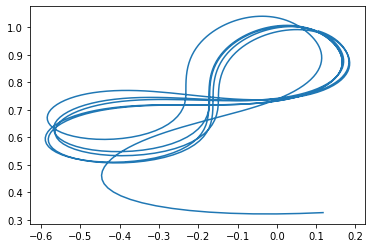

In [3]:
test_case = 21

phi = res[test_case]['simulator']['_x', 'phi']
theta = res[test_case]['simulator']['_x', 'theta']

plt.plot(phi,theta)

In [4]:
model = template_model()

In [21]:
mhe = do_mpc.estimator.MHE(model)

setup_mhe = {
    'n_horizon': 10,
    't_step': 0.15,
    'store_full_solution': True,
    'nlpsol_opts': {'ipopt.linear_solver': 'MA27'},
}

mhe.set_param(**setup_mhe)

P_x = np.diag(np.array([1,1,1, 1, 1e-2]))
P_y = np.diag(np.array([1,1,1, 1]))
P_w = np.diag(np.array([1,1e-2]))

# Or take the shortcut and just pass the tuning matrices for the default objective:
mhe.set_default_objective(P_x, P_y, P_w=P_w)

y_template = mhe.get_y_template()


def y_fun(t_now):
    n_steps = min(mhe.data._y.shape[0], mhe.n_horizon)
    for k in range(-n_steps,0):
        y_template['y_meas',k] = mhe.data._y[k]

    return y_template

mhe.set_y_fun(y_fun)

mhe.setup()


In [ ]:

res_k = res[test_case]['simulator']

x0 = np.concatenate((res_k['_x'][0], res_k['_p'][0]))

mhe.set_initial_state(x0, reset_history=True)


for i in range(700):
    phi_i = res_k['_x','phi'][i] 
    theta_i = res_k['_x','theta'][i]
    u_i = res_k['_u','u_tilde'][i]
    E_i = res_k['_p', 'E_0'][i]
    y_now = np.concatenate((phi_i,theta_i, u_i, E_i))
    mhe.make_step(y_now)

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  5.4582921e+02 5.88e-02 3.58e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

   1  1.7389402e-03 7.16e-05 1.56e-03  -1.7 2.13e-01  -4.0 1.00e+00 1.00e+00f  1
   2  1.7655441e-03 2.60e-08 2.68e-07  -3.8 8.03e-03  -4.5 1.00e+00 1.00e+00h  1
   3  1.7655399e-03 6.05e-11 5.44e-09  -8.6 4.89e-04  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   1.7655399212666370e-03    1.7655399212666370e-03
Dual infeasibility......:   5.4365479442917540e-09    5.4365479442917540e-09
Constraint violation....:   6.0532580684058424e-11    6.0532580684058424e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.4365479442917540e-09    5.4365479442917540e-09


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2673801e+00 3.61e-12 7.88e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  8.8485140e-02 2.90e-13 2.88e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.5085944e-01 9.44e-13 4.40e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.3362227e+01 7.25e-10 8.92e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.6594386e-02 2.35e-13 1.78e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2356573e+00 2.70e-12 1.09e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

   1  1.1919493e-03 1.07e-04 2.69e-04  -1.7 2.72e-01  -4.0 1.00e+00 1.00e+00f  1
   2  1.1884027e-03 7.24e-09 4.30e-08  -5.7 1.29e-03  -4.5 1.00e+00 1.00e+00h  1
   3  1.1884039e-03 1.67e-12 8.96e-10  -8.6 8.07e-05  -5.0 1.00e+00 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   1.1884039399125139e-03    1.1884039399125139e-03
Dual infeasibility......:   8.9621119903841466e-10    8.9621119903841466e-10
Constraint violation....:   1.6685819392847634e-12    1.6685819392847634e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.9621119903841466e-10    8.9621119903841466e-10


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.3289308e-01 1.66e-11 5.92e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.1503572e-01 3.25e-12 4.10e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

Constraint violation....:   1.6209173760162177e-12    1.6209173760162177e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.7709582356334870e-10    2.7709582356334870e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 5
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 4
Total CPU secs in IPOPT (w/o function evaluations)   =      0.003
Total CPU secs in NLP function evaluations           =      0.000

EXIT: Optimal Solution Found.
               t_proc [s]   t_wall [s]    n_eval
           S      0.00406      0.00368         1
       nlp_f      1.1e-05     1.16e-05         5
       nlp_g      4.7e-05     4.72e-05         5
    nlp_g

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.0444305e-01 1.24e-12 5.98e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.4955604e+00 9.68e-13 9.69e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

This is Ipopt version 3.12.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      800
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      325

Total number of variables............................:      250
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      200
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  6.8944129e-01 9.69e-13 7.87e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   

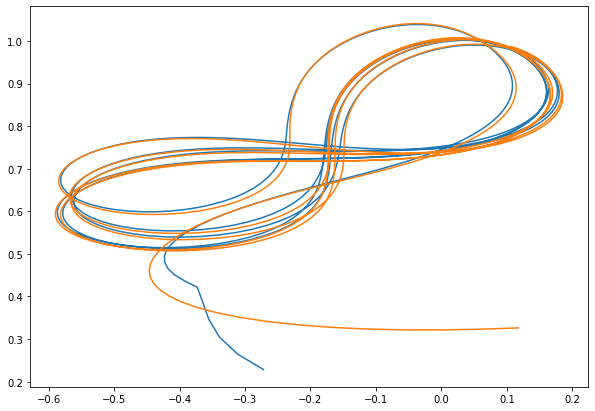

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(mhe.data['_x','phi'][10:], mhe.data['_x','theta'][10:])
ax.plot(res_k['_x','phi'], res_k['_x','theta'])

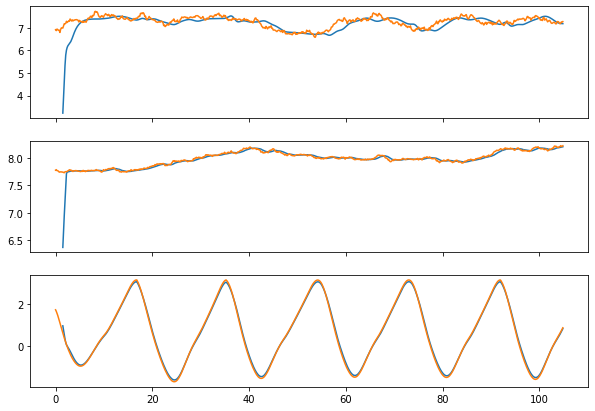

In [20]:
fig, ax = plt.subplots(3,1,figsize=(10,7), sharex=True)

ax[0].plot(mhe.data['_time'][10:], mhe.data['_x','v_0'][10:])
ax[0].plot(res_k['_time'], res_k['_p','v_0'])

ax[1].plot(mhe.data['_time'][10:], mhe.data['_x','E_0'][10:])
ax[1].plot(res_k['_time'], res_k['_p','E_0'])

ax[2].plot(mhe.data['_time'][10:], mhe.data['_x','psi'][10:])
ax[2].plot(res_k['_time'], res_k['_x','psi'])